In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pyfonts import load_bunny_font
from highlight_text import fig_text

In [2]:
edible_plants = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2026/2026-02-03/edible_plants.csv")

In [3]:
edible_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   taxonomic_name           140 non-null    object 
 1   common_name              140 non-null    object 
 2   cultivation              140 non-null    object 
 3   sunlight                 140 non-null    object 
 4   water                    140 non-null    object 
 5   preferred_ph_lower       140 non-null    float64
 6   preferred_ph_upper       140 non-null    float64
 7   nutrients                140 non-null    object 
 8   soil                     94 non-null     object 
 9   season                   67 non-null     object 
 10  temperature_class        140 non-null    object 
 11  temperature_germination  104 non-null    object 
 12  temperature_growing      58 non-null     object 
 13  days_germination         102 non-null    object 
 14  days_harvest             1

In [4]:
edible_plants.head(2)

,taxonomic_name,common_name,cultivation,sunlight,water,preferred_ph_lower,preferred_ph_upper,nutrients,soil,season,temperature_class,temperature_germination,temperature_growing,days_germination,days_harvest,nutritional_info,energy,sensitivities,description,requirements
0,Pisum sativum,Pea,Legume,Full sun,Very High,6.0,7.5,Medium,Loamy,Annual,Half hardy,24,4-24,6,55-75,"A good source of vitamin K, manganese, and die...",80.0,Drought intolerant,"The pea is the small spherical seed, or the se...","Require a sunny, nutrient-rich, moisture-reten..."
1,Phaseolus coccineus,Beans (Runner),Legume,Full sun,Medium,6.0,6.8,Medium,Loamy and clay,Annual,Tender,26,16-30,7,65-85,"A good source of protein, thiamine, and ribofl...",27.0,Drought intolerant,Runner bean plants are more productive than gr...,"Beans are a tender, warm-weather crop. They ar..."


In [5]:
# Create a copy of df
df = edible_plants.copy()

In [6]:
# Convert strings to titlecase
cols = ["sunlight", "water"]

for col in cols:
    df[col] = df[col].str.title()

In [7]:
# Replace slash with or without spaces with a comma
df.loc[:,"sunlight"] = df["sunlight"].str.replace(r'\s*[/,]\s*', ', ', regex=True)
# Replace Brassicas with Brassica
df["cultivation"] = df["cultivation"].str.replace("Brassicas", "Brassica")

In [8]:
# Count of cultivation types
cult_count = df["cultivation"].value_counts().reset_index().sort_values("cultivation", ignore_index=True)

In [9]:
# Create dictionaries and map their values
sunlight_dict = {"Full Sun, Partial Shade, Full Shade": 1,
                 "Partial Shade": 2,
                 "Full Sun, Partial Shade": 3,
                 "Full Sun": 4,                  
                 }
df.loc[:,"sunlight_num"] = df["sunlight"].map(sunlight_dict)

water_dict = {"Very Low": 1,
              "Low": 2,
              "Medium": 3,
              "High": 4,  
              "Very High": 5
                 }
df.loc[:,"water_num"] = df["water"].map(water_dict)

heat_dict = {"Very hard": 1,
                          "Very hardy": 2,
                          "Hardy": 3,
                          "Half hardy": 4,  
                          "Tender": 5,
                          "Very tender":6
                          }
df.loc[:,"temperature_class_num"] = df["temperature_class"].map(heat_dict)

In [10]:
# Calculate mean values per cultivation
df_agg = df.groupby("cultivation")[["sunlight_num", "water_num", "temperature_class_num"]].mean().reset_index()

In [11]:
# Calculate degrees on a circle
df = df_agg.copy()
df["sunlight_num"] = df["sunlight_num"]*30
df["water_num"] = (df["water_num"]*24) +120
df["temperature_class_num"] = (df["temperature_class_num"]*20)+240

In [12]:
df

,cultivation,sunlight_num,water_num,temperature_class_num
0,Allium,86.666667,192.000000,284.444444
1,Brassica,105.000000,199.636364,305.454545
2,Chenopodiaceae,90.000000,192.000000,293.333333
3,Cucurbit,116.250000,201.000000,335.000000
4,Lamiaceae,120.000000,180.000000,310.000000
5,Legume,105.000000,187.200000,316.000000
6,Miscellaneous,108.000000,190.523077,307.692308
7,Salad,80.000000,200.000000,326.666667
8,Solanaceae,115.000000,200.000000,340.000000
9,Solanum,120.000000,192.000000,340.000000


In [13]:
# Create a dictionary for the legend
legend_dict = {1:"Full Sun, Partial Shade, Full Shade",
               2:"Partial Shade",
               3:"Full Sun, Partial Shade",
               4:"Full Sun",
               5:"Very Low",
               6:"Low",
               7:"Medium",
               8:"High",
               9:"Very High",
               10:"Very hard",
               11:"Very hardy",
               12:"Hardy",
               13:"Half hardy",
               14:"Tender",
               15:"Very tender"
              }         

In [14]:
# Parameters
sample_sizes = cult_count["count"].to_list()
cults = df["cultivation"].unique()
R = 1.0
sunlight = "#FFB20D"
water = "#52C2CE"
heat = "#F5440F"
triangle = "#67B85C"

In [15]:
# Function to convert angles from degrees to radians
def deg2rad(deg):
    return np.deg2rad(deg)

In [16]:
# Load custom fonts
font_title = load_bunny_font("Indie Flower")

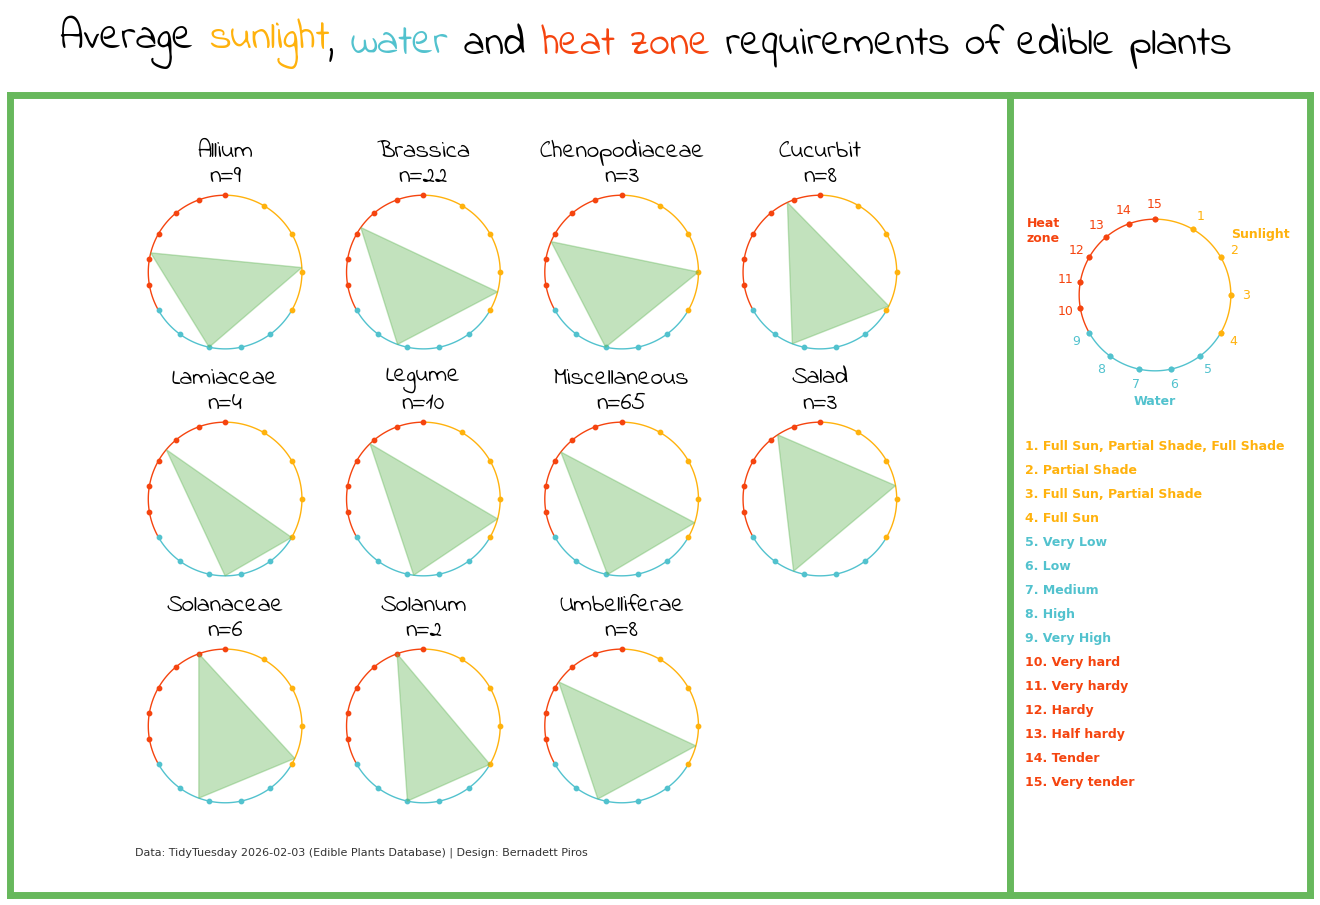

In [17]:
fig = plt.figure(figsize=(10, 8))

# Create axes for main, polar (inside the main), legend, polar legend (inside the legend)
main_ax = fig.add_axes([0, 0, 1, 1])
polar_ax = GridSpec(3, 4, figure=fig, wspace=0.1, hspace=0.4)
legend_ax = main_ax.inset_axes([1, 0, 0.3, 1])  
polar_legend_ax = fig.add_axes(
    [1.045, 0.65, 0.2, 0.2],  
    projection="polar"        
)

# Axes aesthetics and frame
for ax in main_ax, legend_ax:
    ax.tick_params(length=0)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines[["bottom", "left", "top", "right"]].set_color(triangle)
    ax.spines[["bottom", "left", "top", "right"]].set_linewidth(5)
    

#### Polar ax
# Loop through cultivation and create polar subplots 
for i, (cult, sample_size) in enumerate(zip(cults, sample_sizes)):
    ax = fig.add_subplot(polar_ax[i], projection="polar")

    sub = df[df["cultivation"] == cult].iloc[0]

    # Polar axes settings
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)    
    ax.set_axis_off()
    
    # 3 circle lines 
    ax.plot(deg2rad(np.linspace(0, 120, 120)), np.ones(120), color=sunlight, lw=1)
    ax.plot(deg2rad(np.linspace(120, 240, 120)), np.ones(120), color=water, lw=1)
    ax.plot(deg2rad(np.linspace(240, 360, 120)), np.ones(120), color=heat, lw=1)

    # Scatters points on the 3 circle lines
    ax.scatter(deg2rad([30, 60, 90, 120]), [1]*4, color=sunlight, s=10, zorder=3)
    ax.scatter(deg2rad([144, 168, 192, 216, 240]), [1]*5, color=water, s=10, zorder=3)
    ax.scatter(deg2rad([260, 280, 300, 320, 340, 360]), [1]*6, color=heat, s=10, zorder=3)

    # Triangles
    triangle_points = [sub["sunlight_num"], sub["water_num"], sub["temperature_class_num"], sub["sunlight_num"]]    
    triangle_lines = 4*[R]  
    theta = deg2rad(triangle_points)
    ax.fill(theta, triangle_lines, color=triangle, alpha=0.4, zorder=3)   

    # Subplot titles
    ax.set_title(f"{cult}\nn={sample_size}", y=1.005, font=font_title, size=18)       


#### Polar legend ax
# Polar axes settings
polar_legend_ax.set_theta_zero_location("N")
polar_legend_ax.set_theta_direction(-1)    
polar_legend_ax.set_axis_off()
    
# 3 circle lines 
polar_legend_ax.plot(deg2rad(np.linspace(0, 120, 120)), np.ones(120), color=sunlight, lw=1)
polar_legend_ax.plot(deg2rad(np.linspace(120, 240, 120)), np.ones(120), color=water, lw=1)
polar_legend_ax.plot(deg2rad(np.linspace(240, 360, 120)), np.ones(120), color=heat, lw=1)

# Scatters points on the 3 circle lines
polar_legend_ax.scatter(deg2rad([30, 60, 90, 120]), [1]*4, color=sunlight, s=10, zorder=3)
polar_legend_ax.scatter(deg2rad([144, 168, 192, 216, 240]), [1]*5, color=water, s=10, zorder=3)
polar_legend_ax.scatter(deg2rad([260, 280, 300, 320, 340, 360]), [1]*6, color=heat, s=10, zorder=3)

sunlight_angles = [30, 60, 90, 120]
water_angles = [144, 168, 192, 216, 240]
heat_angles = [260, 280, 300, 320, 340, 360]

# Angles and colors
angles = sunlight_angles + water_angles + heat_angles
colors = (
    [sunlight] * len(sunlight_angles) +
    [water] * len(water_angles) +
    [heat] * len(heat_angles)
    )

for i, (angle, color) in enumerate(zip(angles, colors), start=1):
    theta = deg2rad(angle)
    polar_legend_ax.scatter(theta, R, color=color, s=10, zorder=5)

    # Add numbers outside the circle
    polar_legend_ax.text(
        theta,
        R + 0.2,
        str(i),
        ha="center",
        va="center",
        fontsize=9,
        color=color        
        )

# Legend text style
txt_legend = dict(fontsize=9, weight="bold", ha="center", va="center",)

# Text annotations
polar_legend_ax.text(
        deg2rad(60),
        R + 0.6,
        "Sunlight",        
        color=sunlight,
        **txt_legend
        )

polar_legend_ax.text(
        deg2rad(180),
        R + 0.4,
        "Water",        
        color=water,
        **txt_legend
        )

polar_legend_ax.text(
        deg2rad(300),
        R + 0.7,
        "Heat\nzone",        
        color=heat,
        **txt_legend
        )

#### Legend ax
# Define lines for enumerated text
for key, value in legend_dict.items():
    y = 0.15 + ((15 - key) * 0.03)
    if key in [1,2,3,4]:
        color=sunlight
    elif key in[5,6,7,8,9]:
        color=water
    else:
        color=heat
    legend_ax.text(0.05, y, f"{key}. {value}", color=color, weight="bold", ha="left", va="top", fontsize=9)


# Title
fig_text(0.05, 1.1, "Average <sunlight>, <water> and <heat zone> requirements of edible plants", fontsize=30, font=font_title,
        highlight_textprops=[
            {"color": sunlight, "weight": "bold"},
            {"color": water, "weight": "bold"},
            {"color": heat, "weight": "bold"}
            ])
    
# Add caption
fig.text(0.125, 0.05, "Data: TidyTuesday 2026-02-03 (Edible Plants Database) | Design: Bernadett Piros", size=8, alpha=0.8)

plt.show()

# Save figure
#fig.savefig("2026-02-03.png", bbox_inches="tight", pad_inches=0.2)